<a href="https://colab.research.google.com/github/baeksumin/k-project/blob/main/lstm_seq_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import torch.optim as optim
from google.colab import drive
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/[Shared]K-Project/data/mktcap_top10/KR7006840003.csv')

In [ ]:
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,2021/12/30,0,0,0,0,0,NaN
1,2021/12/29,0,0,0,0,0,NaN
2,2021/12/28,0,0,0,0,0,NaN
3,2021/12/27,0,0,0,0,0,NaN
4,2021/12/24,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...
5525,1999/08/17,0,0,1,0,0,NaN
5526,1999/08/16,0,0,1,1,0,NaN
5527,1999/08/13,0,0,1,1,0,NaN
5528,1999/08/12,0,0,1,1,0,NaN


In [ ]:
data[data['MAP_sig'] == -1]

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
234,2021/01/21,0,0,-1,-1,0,0.183673
267,2020/12/02,0,0,1,-1,0,-0.555556
268,2020/12/01,0,0,1,-1,0,-0.777778
269,2020/11/30,0,0,1,-1,0,-1.000000
430,2020/04/06,0,0,1,-1,0,-0.100000
431,2020/04/03,0,0,1,-1,0,-0.250000
439,2020/03/24,0,-1,1,-1,0,-0.750000
440,2020/03/23,0,-1,1,-1,-1,-0.800000
442,2020/03/19,0,-1,1,-1,0,-1.000000
1380,2016/05/24,0,0,-1,-1,0,0.250000


In [ ]:
data['TREND'].isnull().sum()

24

In [ ]:
data['TREND'] = data['TREND'].fillna(0)

In [ ]:
data.isnull().sum()

TRD_DD     0
GDC_sig    0
RSI_sig    0
ROC_sig    0
MAP_sig    0
STC_sig    0
TREND      0
dtype: int64

In [ ]:
data[0.1 < data['TREND']]

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
17,2021/12/07,0,0,0,0,0,1.000000
18,2021/12/06,0,0,0,0,0,0.714286
58,2021/10/08,0,0,0,0,0,0.164835
59,2021/10/07,0,0,0,0,0,0.186813
60,2021/10/06,0,0,0,0,0,0.208791
...,...,...,...,...,...,...,...
5508,1999/09/09,0,0,-1,0,0,0.555556
5509,1999/09/08,0,0,-1,0,0,0.444444
5510,1999/09/07,0,0,-1,0,0,0.333333
5511,1999/09/06,0,0,-1,0,0,0.222222


In [ ]:
#최신 데이터가 뒤로 오도록 정렬
data = data.sort_values(by=['TRD_DD'])
data.set_index('TRD_DD',drop=True,inplace=True)
data.reset_index('TRD_DD',drop=False,inplace=True)
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,1999/08/11,0,0,-1,1,0,0.0
1,1999/08/12,0,0,1,1,0,0.0
2,1999/08/13,0,0,1,1,0,0.0
3,1999/08/16,0,0,1,1,0,0.0
4,1999/08/17,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...
5525,2021/12/24,0,0,0,0,0,0.0
5526,2021/12/27,0,0,0,0,0,0.0
5527,2021/12/28,0,0,0,0,0,0.0
5528,2021/12/29,0,0,0,0,0,0.0


In [ ]:
# data.set_index('TRD_DD', drop=True, inplace=True)
# data

In [ ]:
Y_colname = ['TREND'] #종속변수
X_remove = ['TRD_DD']
X_colname = ['GDC_sig', 'RSI_sig', 'ROC_sig', 'MAP_sig', 'STC_sig'] #입력변수들
X_colname

['GDC_sig', 'RSI_sig', 'ROC_sig', 'MAP_sig', 'STC_sig']

In [ ]:
def datasplit(df, Y_colname, X_colname): #데이터 분리 함수
  df_train = df.loc[0 : round(len(df) * 0.75)] 
  df_test = df.loc[round(len(df) * 0.75) + 1 : ]
  Y_train = df_train[Y_colname]
  X_train = df_train[X_colname]
  Y_test = df_test[Y_colname]
  X_test = df_test[X_colname]
  return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test = datasplit(data, Y_colname, X_colname)

In [ ]:
print('X_train :', X_train.shape, 'Y_train :', Y_train.shape) 
print('X_test :', X_test.shape, 'Y_test :', Y_test.shape)

X_train : (4149, 5) Y_train : (4149, 1)
X_test : (1381, 5) Y_test : (1381, 1)


In [ ]:
Y_train

,TREND
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
4144,-0.333333
4145,-0.250000
4146,-0.166667
4147,-0.083333


In [ ]:
#array로 변환
X_train_arr = X_train.values
Y_train_arr = Y_train.values
X_test_arr = X_test.values
Y_test_arr = Y_test.values

In [ ]:
seq_length = 35 #몇개의 입력데이터로 차분 데이터 생성할지에 대한 파라미터. 지금은 12라고 가정. 나중에 반복문을 통해 sequence 최적화가 필요할듯.
X_train, Y_train = [], []
for index in range(len(X_train_arr) - seq_length): #sequence개의 데이터만큼 차분데이터 분석에 사용하므로, 총 데이터 개수 - sequence개수가 전체 데이터의 길이 --> 총길이만큼 돌리는 것이므로, 기존 차원을 뜻하는 (row, column) 꼴에는 변함 없음 --> 2차원 데이터
  X_train.append(np.array(X_train_arr[index:index + seq_length])) #X_train 데이터 --> index가 sequence인 1차원 데이터 생성 --> sequence를 뜻하는 차원 생성
  Y_train.append(np.ravel(Y_train_arr[index + seq_length:index + seq_length + 1])) #Y_train 데이터 --> index가 sequence인 1차원 데이터 생성 --> 그러나 ravel() 로 차원축소 --> sequence차원 생성되지 않음.
X_train, Y_train = np.array(X_train), np.array(Y_train) #array로 저장되어있는 리스트를 array로 변환해서 저장

In [ ]:
X_test, Y_test = [], [] #동일한 과정 test데이터셋에도 적용
for index in range(len(X_test_arr) - seq_length):
  X_test.append(np.array(X_test_arr[index:index + seq_length])) 
  Y_test.append(np.ravel(Y_test_arr[index + seq_length:index + seq_length + 1]))
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [ ]:
print('X_train :', X_train.shape, 'Y_train :', Y_train.shape) #X/Y 분리가 잘 됨. 데이터 전처리 과정 완료
print('X_test :', X_test.shape, 'Y_test :', Y_test.shape)

X_train : (4116, 33, 5) Y_train : (4116, 1)
X_test : (1348, 33, 5) Y_test : (1348, 1)


In [ ]:
#텐서로 변환 : 파이토치 모델은 float32타입으로만 돌아감.
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

In [ ]:
X_train.shape

torch.Size([4116, 33, 5])

In [ ]:
X_train.dtype

torch.float32

# 모델링

In [ ]:
# Model Class 생성

class SignalPredictor(nn.Module):
    
    def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
        super(SignalPredictor, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers

        self.lstm = nn.LSTM(
        input_size = n_features,
        hidden_size = n_hidden,
        num_layers = n_layers,
        )
        
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
        
    def reset_hidden_state(self):
            self.hidden = (
                torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
                torch.zeros(self.n_layers, self.seq_len, self.n_hidden))
            
    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(sequences.view(len(sequences), self.seq_len, -1), self.hidden)
        last_time_step = lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
    
        return y_pred

In [ ]:
def train_model(model, train_data, train_labels, test_data=None, test_labels=None, num_epochs=250, lr=1e-3):
    loss_fn = torch.nn.MSELoss()
    
    optimiser = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    num_epochs = num_epochs
    
    train_hist = np.zeros(num_epochs)
    test_hist = np.zeros(num_epochs)
    
    for t in range(num_epochs):
        model.reset_hidden_state()
        y_pred = model(X_train)
        loss = loss_fn(y_pred.float(), Y_train)
        
        if test_data is not None:
            with torch.no_grad():
                y_test_pred = model(X_test)
                test_loss = loss_fn(y_test_pred.float(), Y_test)
            test_hist[t] = test_loss.item()
            
            if t % 10 == 0:
                print(f'Epoch {t} train loss: {round(loss.item(),4)} test loss: {round(test_loss.item(),4)}')
        elif t % 10 == 0:
            print(f'Epoch {t} train loss: {loss.item()}')
            
        train_hist[t] = loss.item()
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
    return model.eval(), train_hist, test_hist

In [ ]:
# Hyper-parameter 설정
n_features=X_train.shape[-1]
n_hidden=64
n_layers=4
lr=1e-4
num_epochs=100

In [ ]:
# Training Model
model = SignalPredictor(n_features=n_features, n_hidden=n_hidden, seq_len=seq_length, n_layers=n_layers)
model, train_hist, test_hist = train_model(model, X_train, Y_train, X_test, Y_test, num_epochs=num_epochs, lr=lr)

Epoch 0 train loss: 0.349 test loss: 0.3407
Epoch 10 train loss: 0.3488 test loss: 0.3405
Epoch 20 train loss: 0.3488 test loss: 0.3405
Epoch 30 train loss: 0.3488 test loss: 0.3405
Epoch 40 train loss: 0.3488 test loss: 0.3405
Epoch 50 train loss: 0.3488 test loss: 0.3405
Epoch 60 train loss: 0.3488 test loss: 0.3405
Epoch 70 train loss: 0.3488 test loss: 0.3405
Epoch 80 train loss: 0.3488 test loss: 0.3405
Epoch 90 train loss: 0.3488 test loss: 0.3405


In [ ]:
print(model)

SignalPredictor(
  (lstm): LSTM(5, 64, num_layers=4)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)


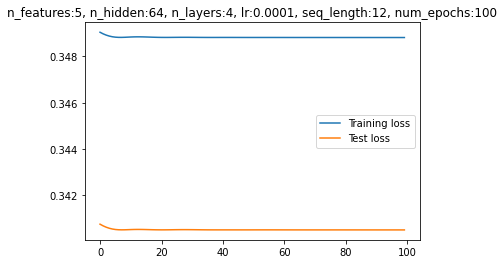

In [ ]:
# plotting Loss
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.title('n_features:{0}, n_hidden:{1}, n_layers:{2}, lr:{3}, seq_length:{4}, num_epochs:{5}'.format(n_features,n_hidden,n_layers,lr,seq_length,num_epochs))
plt.legend()

# 예측

In [ ]:
with torch.no_grad():
    
    preds = []
    for i in range(len(X_test)):
        test_seq = X_test[i:i+1]
        y_test_pred = model(test_seq)
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)
        new_seq = test_seq.numpy().flatten()
        new_seq = np.append(new_seq, pred)
        new_seq = new_seq[1:]
        test_seq = torch.as_tensor(new_seq).view(n_features, seq_length, 1).float()

In [ ]:
preds

[-0.0015166793018579483,
 -0.0014702137559652328,
 -0.0014299750328063965,
 -0.001404929906129837,
 -0.0013950280845165253,
 -0.0013962071388959885,
 -0.00140383280813694,
 -0.001414220780134201,
 -0.0014249645173549652,
 -0.0014347471296787262,
 -0.001442987471818924,
 -0.0014495812356472015,
 -0.0014546681195497513,
 -0.0014584790915250778,
 -0.0014612618833780289,
 -0.0014632679522037506,
 -0.0014646779745817184,
 -0.001465657725930214,
 -0.0014663375914096832,
 -0.001466795802116394,
 -0.0014671143144369125,
 -0.0014673229306936264,
 -0.0014674663543701172,
 -0.0014675557613372803,
 -0.0014676228165626526,
 -0.0014676675200462341,
 -0.0014676973223686218,
 -0.0014677084982395172,
 -0.0014677196741104126,
 -0.0014677252620458603,
 -0.0014677327126264572,
 -0.001467738300561905,
 -0.0014677420258522034,
 -0.0014270469546318054,
 -0.0013681426644325256,
 -0.001318085938692093,
 -0.001290988177061081,
 -0.001287858933210373,
 -0.0013465620577335358,
 -0.0014781653881072998,
 -0.0016216

In [ ]:
Y_test_array = np.array(Y_test).reshape(-1,1)
real = list(Y_test_array.flatten())
real

[-0.14285715,
 -0.5714286,
 -0.71428573,
 -0.85714287,
 -1.0,
 -0.9259259,
 -0.7037037,
 -0.6296296,
 -0.5555556,
 -0.4814815,
 -0.4074074,
 -0.18518518,
 -0.11111111,
 -0.037037037,
 0.037037037,
 0.11111111,
 0.33333334,
 0.4074074,
 0.4814815,
 0.5555556,
 0.6296296,
 0.8518519,
 0.9259259,
 1.0,
 0.875,
 0.75,
 0.375,
 0.25,
 0.125,
 0.0,
 -0.125,
 -0.5,
 -0.625,
 -0.75,
 -0.875,
 -1.0,
 0.2,
 0.6,
 1.0,
 0.95,
 0.9,
 0.75,
 0.7,
 0.65,
 0.6,
 0.55,
 0.35,
 0.3,
 0.25,
 0.2,
 0.05,
 1.110223e-16,
 -0.05,
 -0.1,
 -0.15,
 -0.3,
 -0.35,
 -0.4,
 -0.45,
 -0.5,
 -0.65,
 -0.7,
 -0.75,
 -0.8,
 -0.85,
 -1.0,
 -0.9692308,
 -0.7846154,
 -0.75384617,
 -0.72307694,
 -0.6923077,
 -0.6615385,
 -0.5692308,
 -0.53846157,
 -0.50769234,
 -0.47692308,
 -0.44615385,
 -0.32307693,
 -0.2923077,
 -0.26153848,
 -0.23076923,
 -0.13846155,
 -0.10769231,
 -0.07692308,
 -0.046153847,
 -0.015384615,
 0.07692308,
 0.10769231,
 0.13846155,
 0.16923077,
 0.2,
 0.2923077,
 0.32307693,
 0.35384616,
 0.3846154,
 0.41

In [ ]:
print(len(real))
print(len(preds))

1369
1369


In [ ]:
# 실제값 예측값 데이터 프레임 생성
score_table = pd.DataFrame({'Real':real,
                            'Pred':preds})
score_table

,Real,Pred
0,-0.142857,-0.001517
1,-0.571429,-0.001470
2,-0.714286,-0.001430
3,-0.857143,-0.001405
4,-1.000000,-0.001395
...,...,...
1364,0.000000,-0.001561
1365,0.000000,-0.001561
1366,0.000000,-0.001561
1367,0.000000,-0.001561


In [ ]:
Y_test

tensor([[-0.1429],
        [-0.5714],
        [-0.7143],
        ...,
        [ 0.0000],
        [ 0.0000],
        [ 0.0000]])

딱봐도 예측 굉장히 못한다는 것을 알 수 있음 -> lstm의 많은 파라미터들을 조율/최적화 해봐야 할듯.

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(score_table['Real'], score_table['Pred'])
RMSE = np.sqrt(MSE)
score = 100*(1-(((score_table['Pred'] -score_table['Real'])**2).sum())/((score_table['Real']**2).sum()))

In [ ]:
print("MSE : {0}, RMSE : {1}, SCORE : {2}".format(MSE, RMSE, score))

MSE : 0.34045908580602224, RMSE : 0.5834887195190857, SCORE : 0.013675947334801375


# sequence 최적화

In [ ]:
# from tqdm import tqdm

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/[Shared]K-Project/data/mktcap_top10/KR7006840003.csv')

In [ ]:
# data = data.sort_values(by=['TRD_DD'])
# data.set_index('TRD_DD',drop=True,inplace=True)
# data.reset_index('TRD_DD',drop=False,inplace=True)

In [ ]:
# X_train, X_test, Y_train, Y_test = datasplit(data, Y_colname, X_colname)
# X_train_arr = X_train.values
# Y_train_arr = Y_train.values
# X_test_arr = X_test.values
# Y_test_arr = Y_test.values

In [ ]:
seqsize_list = [i for i in range(10,50,5)]
for i in tqdm(seqsize_list):
  seq_length = i
  X_train, Y_train = [], []
  for index in range(len(X_train_arr) - seq_length):
    X_train.append(np.array(X_train_arr[index:index + seq_length])) 
    Y_train.append(np.ravel(Y_train_arr[index + seq_length:index + seq_length + 1])) 
  X_train, Y_train = np.array(X_train), np.array(Y_train)
  X_test, Y_test = [], [] #동일한 과정 test데이터셋에도 적용
  for index in range(len(X_test_arr) - seq_length):
    X_test.append(np.array(X_test_arr[index:index + seq_length])) 
    Y_test.append(np.ravel(Y_test_arr[index + seq_length:index + seq_length + 1]))
  X_test, Y_test = np.array(X_test), np.array(Y_test)

  X_train = torch.tensor(X_train, dtype=torch.float32)
  X_test = torch.tensor(X_test, dtype=torch.float32)
  Y_train = torch.tensor(Y_train, dtype=torch.float32)
  Y_test = torch.tensor(Y_test, dtype=torch.float32)

  model = SignalPredictor(n_features=n_features, n_hidden=n_hidden, seq_len=seq_length, n_layers=n_layers)
  model, train_hist, test_hist = train_model(model, X_train, Y_train, X_test, Y_test, num_epochs=50, lr=lr)


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 0 train loss: 0.352 test loss: nan
Epoch 10 train loss: 0.3499 test loss: nan
Epoch 20 train loss: 0.3491 test loss: nan
Epoch 30 train loss: 0.349 test loss: nan
Epoch 40 train loss: 0.349 test loss: nan


 12%|█▎        | 1/8 [06:21<44:31, 381.68s/it]

Epoch 0 train loss: 0.3562 test loss: nan
Epoch 10 train loss: 0.3519 test loss: nan
Epoch 20 train loss: 0.3496 test loss: nan
Epoch 30 train loss: 0.3488 test loss: nan
Epoch 40 train loss: 0.3488 test loss: nan


 25%|██▌       | 2/8 [14:56<46:00, 460.08s/it]

Epoch 0 train loss: 0.3664 test loss: nan
Epoch 10 train loss: 0.3588 test loss: nan
Epoch 20 train loss: 0.3535 test loss: nan
Epoch 30 train loss: 0.3505 test loss: nan
Epoch 40 train loss: 0.3493 test loss: nan


 38%|███▊      | 3/8 [26:00<46:04, 552.95s/it]

Epoch 0 train loss: 0.3526 test loss: nan
Epoch 10 train loss: 0.3502 test loss: nan
Epoch 20 train loss: 0.3491 test loss: nan
Epoch 30 train loss: 0.3489 test loss: nan
Epoch 40 train loss: 0.3489 test loss: nan


 50%|█████     | 4/8 [39:23<43:28, 652.00s/it]

Epoch 0 train loss: 0.3523 test loss: nan
Epoch 10 train loss: 0.3496 test loss: nan
Epoch 20 train loss: 0.349 test loss: nan
Epoch 30 train loss: 0.3491 test loss: nan
Epoch 40 train loss: 0.349 test loss: nan


 62%|██████▎   | 5/8 [55:13<37:58, 759.44s/it]

Epoch 0 train loss: 0.3611 test loss: nan
Epoch 10 train loss: 0.3549 test loss: nan
Epoch 20 train loss: 0.351 test loss: nan
Epoch 30 train loss: 0.3491 test loss: nan
Epoch 40 train loss: 0.3487 test loss: nan


 75%|███████▌  | 6/8 [1:12:28<28:26, 853.09s/it]

Epoch 0 train loss: 0.3567 test loss: nan
Epoch 10 train loss: 0.3526 test loss: nan
Epoch 20 train loss: 0.3501 test loss: nan
Epoch 30 train loss: 0.3491 test loss: nan
Epoch 40 train loss: 0.349 test loss: nan


 88%|████████▊ | 7/8 [1:30:46<15:33, 933.06s/it]

Epoch 0 train loss: 0.3527 test loss: nan
Epoch 10 train loss: 0.3498 test loss: nan
Epoch 20 train loss: 0.3488 test loss: nan
Epoch 30 train loss: 0.3487 test loss: nan
Epoch 40 train loss: 0.3487 test loss: nan


100%|██████████| 8/8 [1:49:44<00:00, 823.05s/it]


seq_lenth가 35 부근일 때 가장 loss가 적게 나옴. -> 35부근으로 다시 돌려보기

In [ ]:
seqsize_list = [i for i in range(30,40,1)]
for i in tqdm(seqsize_list):
  seq_length = i
  X_train, Y_train = [], []
  for index in range(len(X_train_arr) - seq_length):
    X_train.append(np.array(X_train_arr[index:index + seq_length])) 
    Y_train.append(np.ravel(Y_train_arr[index + seq_length:index + seq_length + 1])) 
  X_train, Y_train = np.array(X_train), np.array(Y_train)
  X_test, Y_test = [], [] #동일한 과정 test데이터셋에도 적용
  for index in range(len(X_test_arr) - seq_length):
    X_test.append(np.array(X_test_arr[index:index + seq_length])) 
    Y_test.append(np.ravel(Y_test_arr[index + seq_length:index + seq_length + 1]))
  X_test, Y_test = np.array(X_test), np.array(Y_test)

  X_train = torch.tensor(X_train, dtype=torch.float32)
  X_test = torch.tensor(X_test, dtype=torch.float32)
  Y_train = torch.tensor(Y_train, dtype=torch.float32)
  Y_test = torch.tensor(Y_test, dtype=torch.float32)

  model = SignalPredictor(n_features=n_features, n_hidden=n_hidden, seq_len=seq_length, n_layers=n_layers)
  model, train_hist, test_hist = train_model(model, X_train, Y_train, X_test, Y_test, num_epochs=30, lr=lr)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 train loss: 0.3508 test loss: nan
Epoch 10 train loss: 0.3492 test loss: nan
Epoch 20 train loss: 0.349 test loss: nan


 10%|█         | 1/10 [07:50<1:10:33, 470.35s/it]

Epoch 0 train loss: 0.3491 test loss: nan
Epoch 10 train loss: 0.3491 test loss: nan
Epoch 20 train loss: 0.3491 test loss: nan


 20%|██        | 2/10 [15:51<1:03:34, 476.83s/it]

Epoch 0 train loss: 0.3594 test loss: nan
Epoch 10 train loss: 0.3546 test loss: nan
Epoch 20 train loss: 0.3514 test loss: nan


 30%|███       | 3/10 [25:04<59:39, 511.36s/it]  

Epoch 0 train loss: 0.3499 test loss: nan
Epoch 10 train loss: 0.349 test loss: nan
Epoch 20 train loss: 0.349 test loss: nan


 40%|████      | 4/10 [34:32<53:22, 533.76s/it]

Epoch 0 train loss: 0.3492 test loss: nan
Epoch 10 train loss: 0.3488 test loss: nan
Epoch 20 train loss: 0.3488 test loss: nan


 50%|█████     | 5/10 [44:22<46:10, 554.19s/it]

Epoch 0 train loss: 0.3491 test loss: nan
Epoch 10 train loss: 0.3487 test loss: nan
Epoch 20 train loss: 0.3487 test loss: nan


 60%|██████    | 6/10 [54:26<38:04, 571.21s/it]

Epoch 0 train loss: 0.3587 test loss: nan
Epoch 10 train loss: 0.3543 test loss: nan
Epoch 20 train loss: 0.3512 test loss: nan


 70%|███████   | 7/10 [1:04:42<29:17, 585.83s/it]

Epoch 0 train loss: 0.3588 test loss: nan
Epoch 10 train loss: 0.3543 test loss: nan
Epoch 20 train loss: 0.3512 test loss: nan


 80%|████████  | 8/10 [1:14:56<19:49, 594.53s/it]

Epoch 0 train loss: 0.3654 test loss: nan
Epoch 10 train loss: 0.3593 test loss: nan
Epoch 20 train loss: 0.3547 test loss: nan


 90%|█████████ | 9/10 [1:24:57<09:56, 596.79s/it]

Epoch 0 train loss: 0.3595 test loss: nan
Epoch 10 train loss: 0.3546 test loss: nan
Epoch 20 train loss: 0.3512 test loss: nan


100%|██████████| 10/10 [1:36:34<00:00, 579.48s/it]


최종적으로 35 선택.

# 실제 미래 예측을 위한 데이터 준비

In [ ]:
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,1999/08/11,0,0,-1,1,0,0.0
1,1999/08/12,0,0,1,1,0,0.0
2,1999/08/13,0,0,1,1,0,0.0
3,1999/08/16,0,0,1,1,0,0.0
4,1999/08/17,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...
5525,2021/12/24,0,0,0,0,0,0.0
5526,2021/12/27,0,0,0,0,0,0.0
5527,2021/12/28,0,0,0,0,0,0.0
5528,2021/12/29,0,0,0,0,0,0.0


In [ ]:
X_data = data[X_colname]
Y_data = data[Y_colname]

In [ ]:
X_data_arr = X_data.values
Y_data_arr = Y_data.values

In [ ]:
X_data, Y_data = [], [] 
for index in range(len(X_data_arr) - seq_length):
  X_data.append(np.array(X_data_arr[index:index + seq_length])) 
  Y_data.append(np.ravel(Y_data_arr[index + seq_length:index + seq_length + 1]))
X_data, Y_data = np.array(X_data), np.array(Y_data)

In [ ]:
print('X_data :', X_data.shape, 'Y_data :', Y_data.shape)

X_data : (5518, 12, 5) Y_data : (5518, 1)


In [ ]:
X_data = torch.tensor(X_data, dtype=torch.float32)
Y_data = torch.tensor(Y_data, dtype=torch.float32)

# 실제 미래 예측

In [ ]:
DAYS_TO_PREDICT = 14
with torch.no_grad():
    test_seq = X_data[:1]
    preds = []
    for _ in range(DAYS_TO_PREDICT):
        y_test_pred = model(test_seq)
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)
        new_seq = test_seq.numpy().flatten()
        new_seq = np.append(new_seq, [pred])
        new_seq = new_seq[1:]

In [ ]:
preds

[-0.001548832282423973,
 -0.0014909729361534119,
 -0.0013778209686279297,
 -0.001224316656589508,
 -0.0010544806718826294,
 -0.0008897017687559128,
 -0.0007438790053129196,
 -0.0006233491003513336,
 -0.0005288198590278625,
 -0.00045771896839141846,
 -0.00040600821375846863,
 -0.0003694407641887665,
 -0.00034418143332004547,
 -0.00032708048820495605]